**Import Required Libraries**

In [133]:
import numpy as np #arrays
import pandas as pd #input and data analysis
import matplotlib.pyplot as plt #data visualization library
%matplotlib inline
import seaborn as sns #another data visualization library

from sklearn.preprocessing import StandardScaler #for Scaling the features
from sklearn.model_selection import train_test_split #to split data between training and testing
from sklearn.linear_model import LogisticRegression #to create LogisticRegression model
from sklearn.metrics import confusion_matrix, classification_report #to check for model's accuracy

import os

 **Import Dataset**

In [134]:
data = pd.read_csv('../input/creditcard.csv')

In [135]:
data.shape

(284807, 31)

In [136]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> *We have to Train the model to Predict the class of the transaction either to be 0 or 1; where 0-->Genuine , 1-->Fraud*

In [137]:
missing_values = data.isnull().sum().sort_values(ascending=False)

In [138]:
missing_values.head() 

Class    0
V14      0
V1       0
V2       0
V3       0
dtype: int64

> *No missing Values*

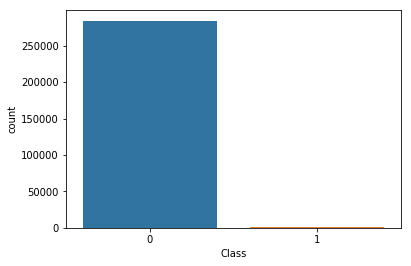

In [139]:
sns.countplot(x = 'Class', data = data)

> *Fraud Cases are less compared to Genuine Cases*

 **Divide data into X and y where : 
  X --> Features, y --> Label**

In [140]:
y = data['Class']
data.drop('Class', inplace = True, axis=1)
X = data

In [141]:
sc = StandardScaler() #Create object of StandardScaler

In [142]:
X = sc.fit_transform(X)

In [143]:
X #Scaled Features

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

 **Splitting data between training and test sets**

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

 ## **Various methods to train the model**

 We will train our classifier(model) using different classification techniques and compare their accuracies: 
 1. Logistic Regression
 2. Decision Trees
 3. Random Forest
 4. K-Nearest Neighbours

1.  > ## **Logistic Regression**

> **Create an object of LogisticRegression**

In [145]:
lr_model = LogisticRegression()

In [146]:
lr_model.fit(X_train, y_train) #Train model on X_train

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
lr_pred = lr_model.predict(X_test) #predict label:y for data in X_test

In [148]:
lr_cm = confusion_matrix(y_test, lr_pred)

In [149]:
lr_cm #71143 correct predicted labels out of 71201 data inputs

array([[71068,     9],
       [   50,    75]])

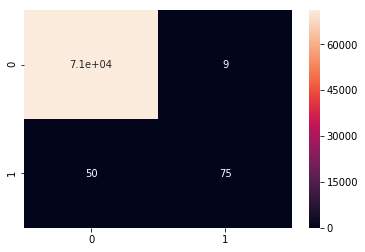

In [150]:
sns.heatmap(lr_cm, annot = True)

 **accuracy of Logistic Regression Model ~ 99.92%**